In [1]:
import pandas as pd
import numpy as np


In [2]:
df1 = pd.read_csv('athlete_events.csv')
df2 = pd.read_csv('noc_regions.csv')

In [3]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)


In [4]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [6]:
# Merge df1 and df2 on the 'NOC' column
athlete_df=df1.merge(df2, on='NOC', how='left')
athlete_df=athlete_df[athlete_df['Season']=='Summer']



In [7]:
medal_tally = athlete_df[['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal','region']]

In [8]:
medal_tally.drop_duplicates(subset=['NOC','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\3753184021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_tally.drop_duplicates(subset=['NOC','Year','City','Sport','Event','Medal'],inplace=True)


In [9]:
medal_tally=pd.concat([medal_tally, pd.get_dummies(medal_tally['Medal']).astype(int)], axis=1).drop(columns=['Medal'])



In [10]:
medal_tally.drop(columns=['Games'], inplace=True)

In [11]:
medal_tally['Total Medals'] = medal_tally[['Gold', 'Silver', 'Bronze']].sum(axis=1)

In [12]:
medal_tally

,Team,NOC,Year,City,Sport,Event,region,Bronze,Gold,Silver,Total Medals
0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,China,0,0,0,0
1,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,China,0,0,0,0
2,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,Denmark,0,0,0,0
3,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,0,1,0,1
26,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,Netherlands,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
269693,Soviet Union,URS,1956,Melbourne,Athletics,Athletics Women's Shot Put,Russia,0,0,1,1
269695,Soviet Union,URS,1964,Tokyo,Athletics,Athletics Women's Shot Put,Russia,1,0,0,1
269702,Poland,POL,1980,Moskva,Swimming,Swimming Men's 100 metres Butterfly,Poland,0,0,0,0
269703,Poland,POL,1980,Moskva,Swimming,Swimming Men's 200 metres Butterfly,Poland,0,0,0,0


In [20]:
medal_tally_overall = medal_tally.groupby('region')[['Gold','Silver','Bronze','Total Medals']].agg(sum).sort_values(by=['Total Medals','Gold','Silver','Bronze'], ascending=[False,False,False,False]).reset_index()
medal_tally_overall.index = medal_tally_overall.index + 1

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\2372295559.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  medal_tally_overall = medal_tally.groupby('region')[['Gold','Silver','Bronze','Total Medals']].agg(sum).sort_values(by=['Total Medals','Gold','Silver','Bronze'], ascending=[False,False,False,False]).reset_index()


In [21]:
#Country-wise medal tally
medal_tally_country = medal_tally[medal_tally['Team']=='India'].groupby('Year')[['Gold','Silver','Bronze','Total Medals']].agg(sum)
medal_tally_country

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\4017285536.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  medal_tally_country = medal_tally[medal_tally['Team']=='India'].groupby('Year')[['Gold','Silver','Bronze','Total Medals']].agg(sum)


,Gold,Silver,Bronze,Total Medals
Year,,,,
1900,0,2,0,2
1920,0,0,0,0
1924,0,0,0,0
1928,1,0,0,1
1932,1,0,0,1
1936,1,0,0,1
1948,1,0,0,1
1952,1,0,1,2
1956,1,0,0,1


In [22]:
medal_tally_overall

,region,Gold,Silver,Bronze,Total Medals
1,USA,1035,802,707,2544
2,Russia,592,498,487,1577
3,Germany,442,457,490,1389
4,UK,278,316,298,892
5,France,233,255,282,770
...,...,...,...,...,...
201,Timor-Leste,0,0,0,0
202,Turkmenistan,0,0,0,0
203,Vanuatu,0,0,0,0
204,"Virgin Islands, British",0,0,0,0


In [26]:
medal_tally_year = medal_tally[medal_tally['Year']==2016].groupby('region')[['Gold','Silver','Bronze','Total Medals']].agg(sum).sort_values(by=['Total Medals','Gold','Silver','Bronze'], ascending=[False,False,False,False]).reset_index()
medal_tally_year.index = medal_tally_year.index + 1

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\575205292.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  medal_tally_year = medal_tally[medal_tally['Year']==2016].groupby('region')[['Gold','Silver','Bronze','Total Medals']].agg(sum).sort_values(by=['Total Medals','Gold','Silver','Bronze'], ascending=[False,False,False,False]).reset_index()


In [27]:
medal_tally_year

,region,Gold,Silver,Bronze,Total Medals
1,USA,46,37,38,121
2,China,26,18,26,70
3,UK,27,23,17,67
4,Russia,19,17,20,56
5,Germany,17,10,15,42
...,...,...,...,...,...
199,"Virgin Islands, British",0,0,0,0
200,"Virgin Islands, US",0,0,0,0
201,Yemen,0,0,0,0
202,Zambia,0,0,0,0


In [37]:
medal_tally_counrty_year = medal_tally[(medal_tally['region']=='USA') & (medal_tally['Year']==2016)].groupby('Sport')[['Gold','Silver','Bronze','Total Medals']].agg(sum)

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\3883064143.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  medal_tally_counrty_year = medal_tally[(medal_tally['region']=='USA') & (medal_tally['Year']==2016)].groupby('Sport')[['Gold','Silver','Bronze','Total Medals']].agg(sum)


In [89]:
nations_over_time = athlete_df.groupby('Year')['Event'].nunique().reset_index()
nations_over_time.rename(columns={'Year':'Edition','Event':'No. of Countries'},inplace=True)
import plotly.express as px
fig = px.line(nations_over_time,x='Edition',y='No. of Countries')
fig.show()

In [94]:
events_over_time = athlete_df.groupby('Year')['Event'].nunique().reset_index()
events_over_time.rename(columns={'Year':'Edition','Event':'No. of Events'},inplace=True)
fig = px.line(events_over_time,x='Edition',y='No. of Events')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

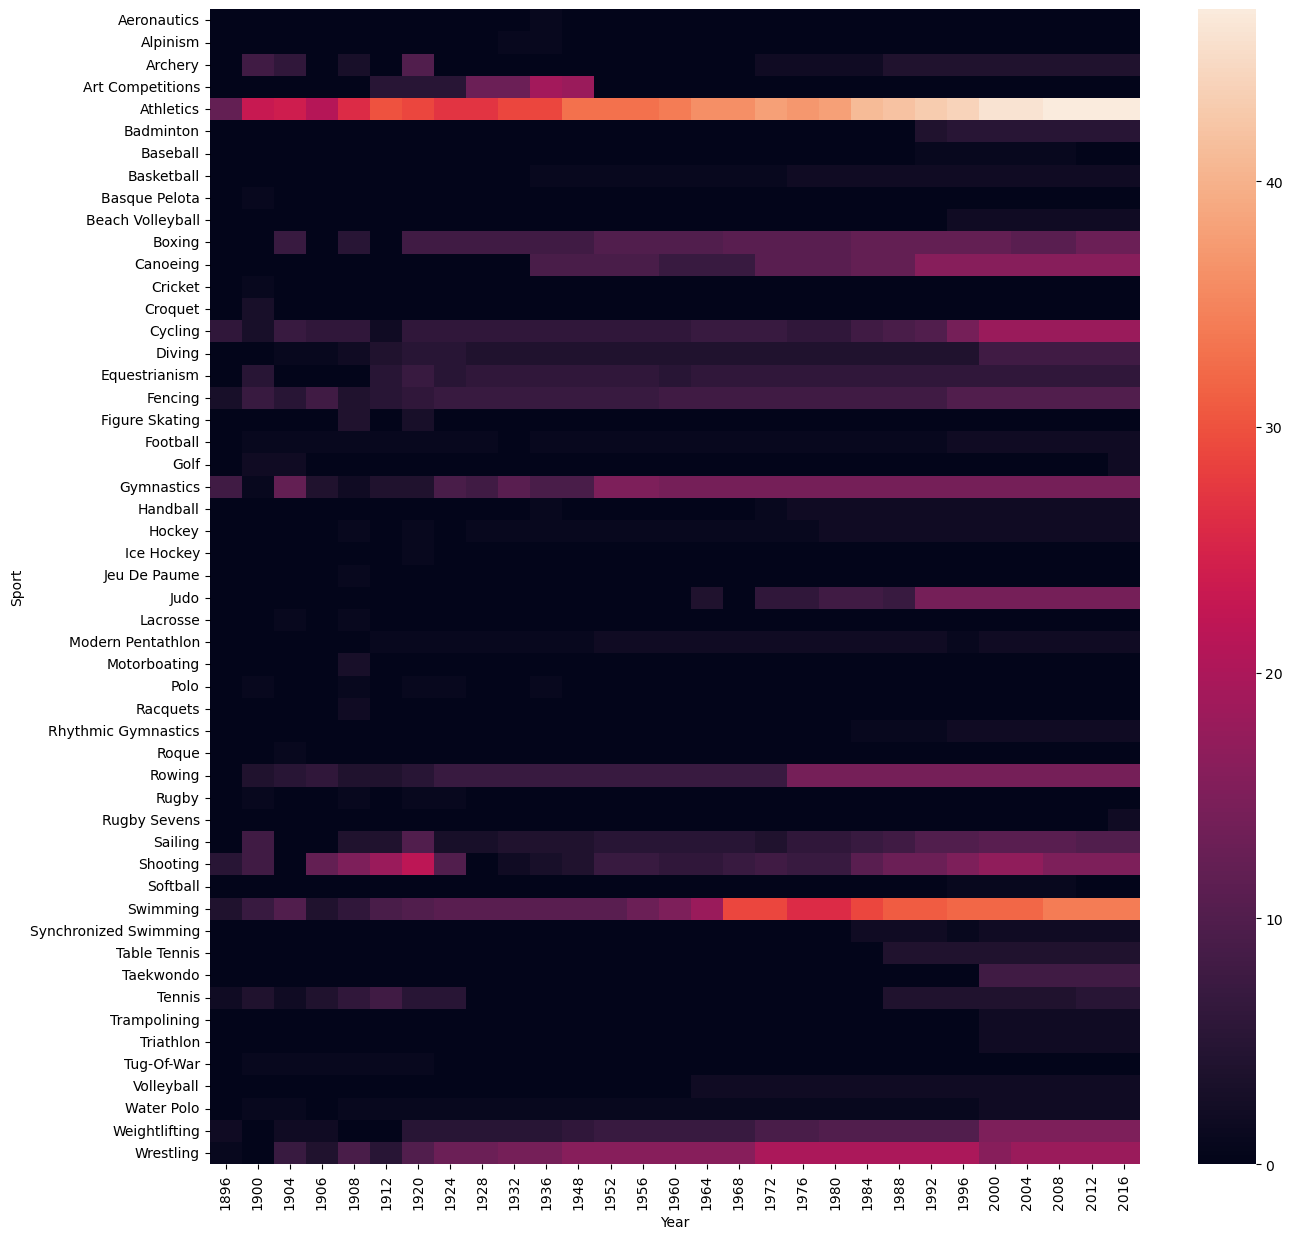

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(15,15))
x = athlete_df.drop_duplicates(subset=['Year','Sport','Event'])
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count',fill_value=0))

In [100]:
athlete_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269721,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
269722,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
269723,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
269724,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


In [120]:
most_successful = athlete_df[['Name','Team','Sport','Event','Medal']].reset_index(drop=True)
most_successful=pd.concat([most_successful, pd.get_dummies(most_successful['Medal']).astype(int)], axis=1).drop(columns=['Medal'])
most_successful['Total Medals']=most_successful[['Gold','Silver','Bronze']].sum(axis=1)
most_successful=most_successful[most_successful['Total Medals']>0]

most_successful = (most_successful.groupby('Name')['Gold'].sum().sort_values(ascending=False).reset_index())
most_successful.index = most_successful.index + 1
most_successful.head(15)

,Name,Gold
1,"Michael Fred Phelps, II",23
2,"Raymond Clarence ""Ray"" Ewry",10
3,Larysa Semenivna Latynina (Diriy-),9
4,"Frederick Carlton ""Carl"" Lewis",9
5,Mark Andrew Spitz,9
6,Paavo Johannes Nurmi,9
7,Birgit Fischer-Schmidt,8
8,"Matthew Nicholas ""Matt"" Biondi",8
9,Usain St. Leo Bolt,8
10,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8


In [133]:
country_medal_tally = athlete_df[['Event','region','Year','Medal']].drop_duplicates()
country_medal_tally = pd.concat([country_medal_tally, pd.get_dummies(country_medal_tally['Medal']).astype(int)], axis=1).drop(columns=['Medal'])
country_medal_tally['Total Medals']=country_medal_tally[['Gold','Silver','Bronze']].sum(axis=1)
country_medals_by_year = country_medal_tally.groupby('Year')[['Gold','Silver','Bronze','Total Medals']].sum().reset_index()
color_map = {
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Bronze': '#CD7F32',
    'Total Medals': '#1f77b4'
}
fig = px.line(
    country_medals_by_year,
    x='Year',
    y=['Gold', 'Silver', 'Bronze', 'Total Medals'],
    title='USA Medal Tally Over the Years',
    color_discrete_map=color_map,
    labels={'value': 'Number of Medals', 'variable': 'Medal Type'}
)
fig.show()



<Axes: xlabel='Year', ylabel='Sport'>

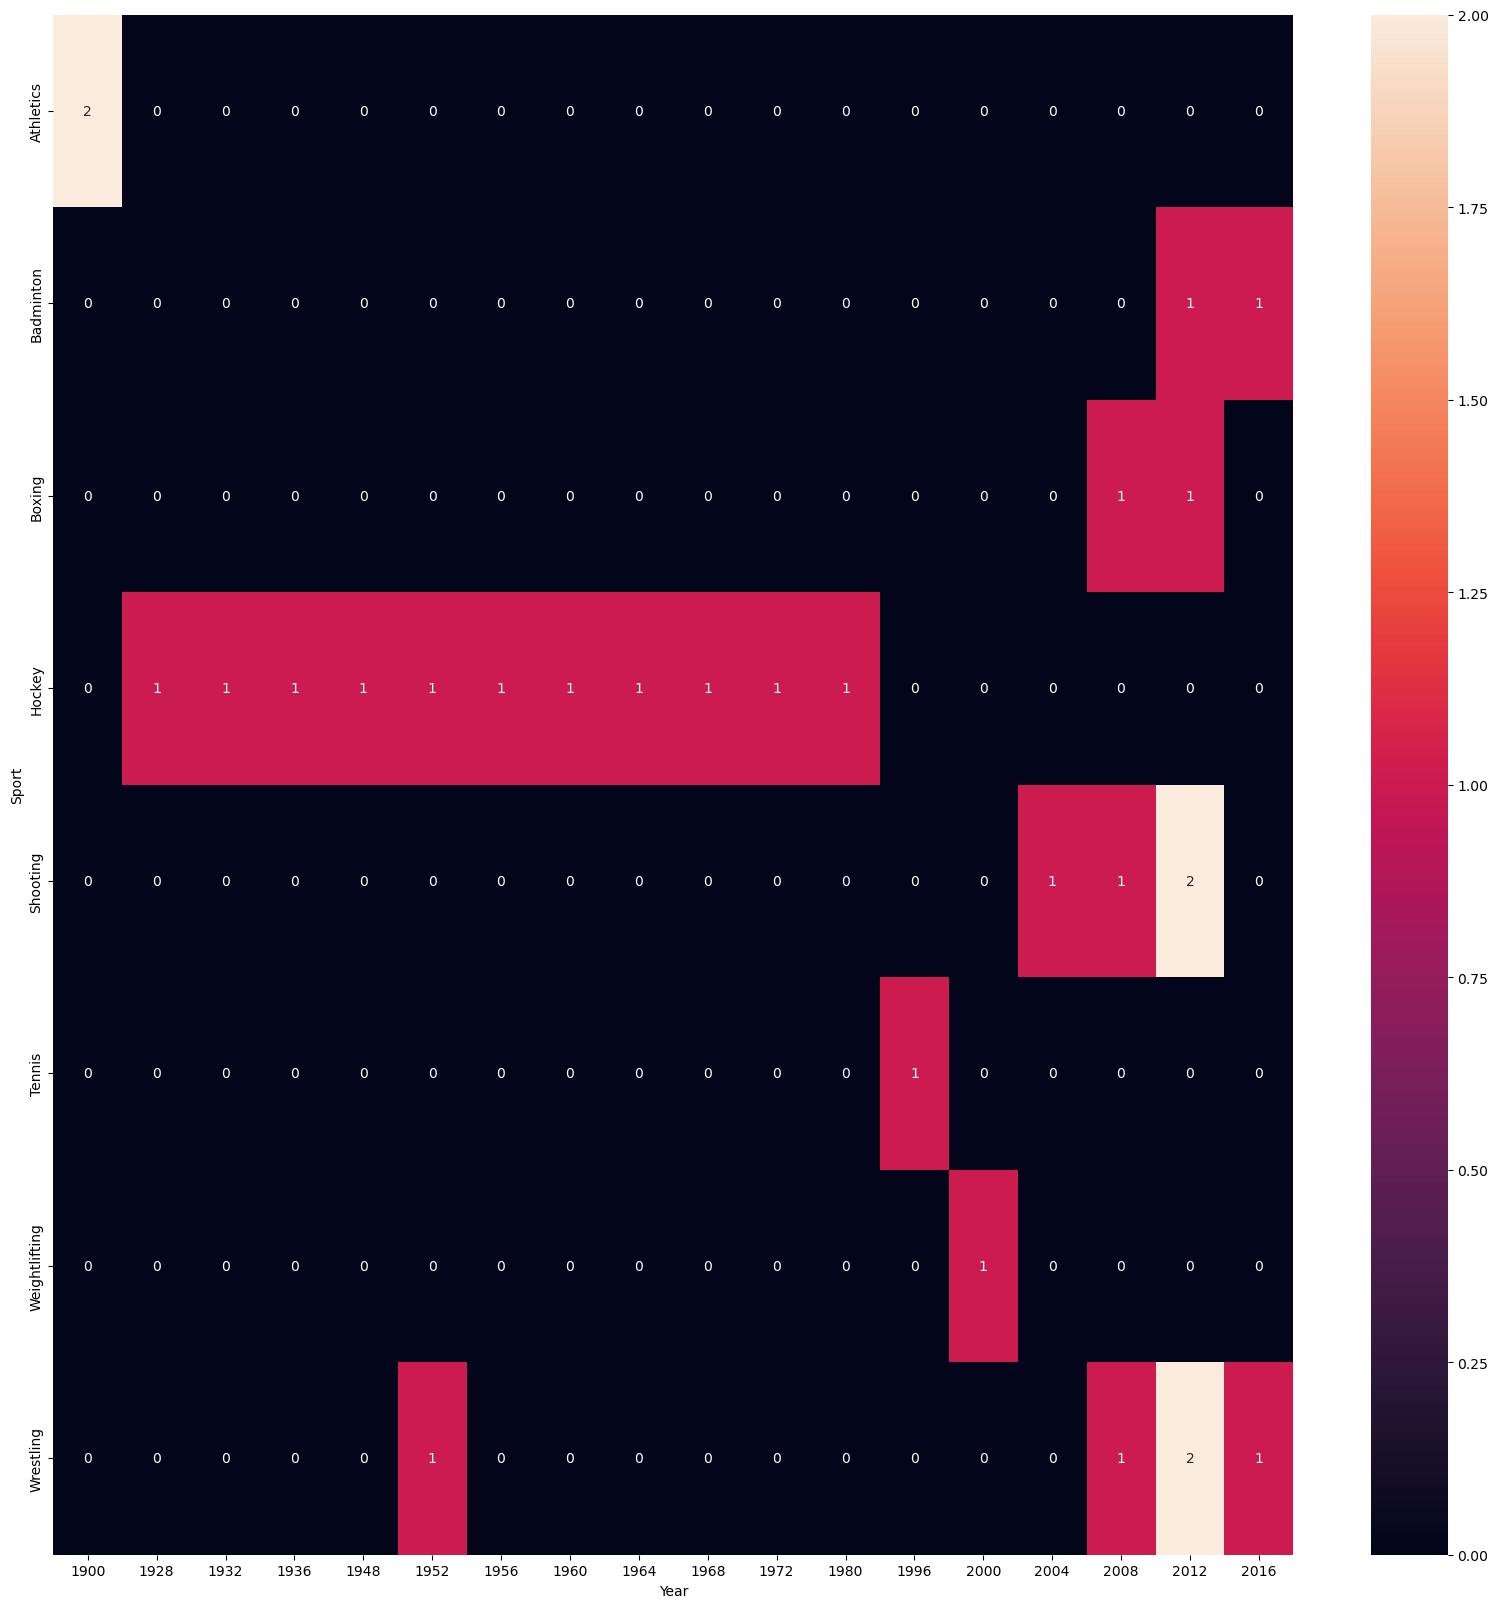

In [ ]:
country_medal_tally = athlete_df.dropna(subset=['Medal'])
country_medal_tally = pd.concat([country_medal_tally, pd.get_dummies(country_medal_tally['Medal']).astype(int)], axis=1).drop(columns=['Medal'])
country_medal_tally = country_medal_tally[country_medal_tally['region']=="India"][['Sport','Event','region','Year','Gold','Silver','Bronze']].drop_duplicates()
country_medal_tally['Total Medals']=country_medal_tally[['Gold','Silver','Bronze']].sum(axis=1)
fig,ax = plt.subplots(figsize=(20,20))
ax=sns.heatmap(country_medal_tally.pivot_table(index='Sport',columns='Year',values='Total Medals',aggfunc='sum',fill_value=0),annot=True)


In [166]:
country_medal_tally = athlete_df.dropna(subset=['Medal'])
country_medal_tally = pd.concat([country_medal_tally, pd.get_dummies(country_medal_tally['Medal']).astype(int)], axis=1).drop(columns=['Medal'])
country_medal_tally = country_medal_tally[country_medal_tally['region']=="India"][['Name','region','Sport','Gold','Silver','Bronze']]
country_medal_tally['Total Medals']=country_medal_tally[['Gold','Silver','Bronze']].sum(axis=1)
country_medal_tally = (
    country_medal_tally
    .groupby(['Name','Sport'])[['Gold', 'Silver', 'Bronze', 'Total Medals']]
    .sum()
    .sort_values(by=['Gold', 'Silver', 'Bronze', 'Total Medals'], ascending=[False, False, False, False])
    .reset_index()
)
country_medal_tally.index = country_medal_tally.index + 1
country_medal_tally.head(10)

,Name,Sport,Gold,Silver,Bronze,Total Medals
1,Leslie Walter Claudius,Hockey,3,1,0,4
2,Udham Singh Kular,Hockey,3,1,0,4
3,"Balbir Singh Dosanjh, Sr.",Hockey,3,0,0,3
4,Dhyan Chand Bais,Hockey,3,0,0,3
5,Randhir Singh Gentle,Hockey,3,0,0,3
6,Ranganathan Francis,Hockey,3,0,0,3
7,Richard James Allen,Hockey,3,0,0,3
8,Shankar Pillay Laxman,Hockey,2,1,0,3
9,Amir Chand Kumar,Hockey,2,0,0,2
10,Broome Eric Pinniger,Hockey,2,0,0,2


In [180]:
athletewise = athlete_df[['Name','Sex','Age','Height',"Weight",'region','Medal','Year','Sport']].copy()
athletewise=athletewise[athletewise['Sport']=='Aeronautics']
Overall = athletewise.drop_duplicates(subset=['Name','region','Year','Age']).copy()
Gold = athletewise[athletewise['Medal']=='Gold'].drop_duplicates(subset=['Name','region','Year','Age']).copy()
Silver = athletewise[athletewise['Medal']=='Silver'].drop_duplicates(subset=['Name','region','Year','Age']).copy()
Bronze = athletewise[athletewise['Medal']=='Bronze'].drop_duplicates(subset=['Name','region','Year','Age']).copy()
Overall = Overall['Age'].dropna()
Gold = Gold['Age'].dropna()
Silver = Silver['Age'].dropna()
Bronze = Bronze['Age'].dropna()
import plotly.figure_factory as ff
color_map = {
    'Overall Age': '#1f77b4',
    'Gold Medalist': '#FFD700',
    'Silver Medalist': '#C0C0C0',
    'Bronze Medalist': '#CD7F32',
}
fig = ff.create_distplot([Overall,Gold,Silver,Bronze],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False,colors=[color_map['Overall Age'], color_map['Gold Medalist'], color_map['Silver Medalist'], color_map['Bronze Medalist']])
fig.show()


ValueError: min() iterable argument is empty

C:\Users\jayan\AppData\Local\Temp\ipykernel_13232\1591498669.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





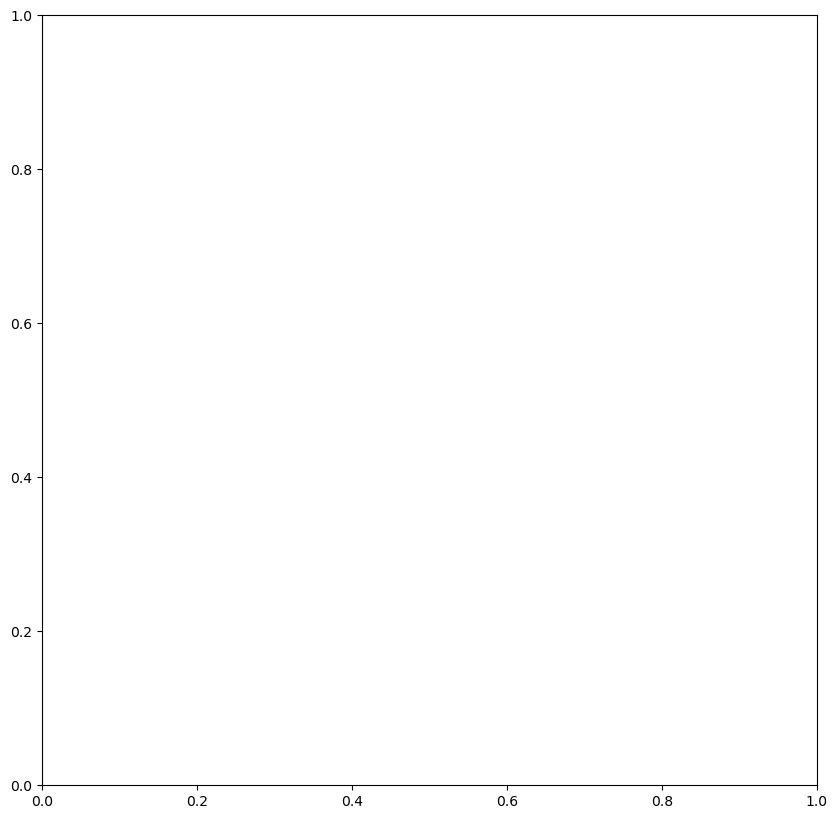

In [198]:
htwt = athlete_df[['Sex','Height','Weight','Medal','Sport']].copy()
htwt['Medal'].fillna('No Medal', inplace=True)
htwt=htwt[htwt['Sport']=='Aeronautics']

# Define the order and colors for medals
hue_order = ['Gold', 'Silver', 'Bronze', 'No Medal']
palette = {
    'Gold': '#FFD700',
    'Silver': '#C0C0C0',
    'Bronze': '#CD7F32',
    'No Medal': '#1f77b4'
}

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='Weight',
    y='Height',
    data=htwt,
    hue='Medal',
    hue_order=hue_order,
    palette=palette,
    style='Sex',         # Markers by gender
    markers=True,         # Use different markers
    s=100
)
plt.show()

In [212]:
# Group by Year and Sex, count unique participants (assuming 'Name' is unique per athlete)
participation = (
    athlete_df
    .drop_duplicates(subset=['Year', 'Name', 'Sex'])
    .groupby(['Year', 'Sex'])['Name']
    .count()
    .reset_index()
    .rename(columns={'Name': 'Count'})
)

# Create the line plot
fig = px.line(
    participation,
    x='Year',
    y='Count',
    color='Sex',
    markers=True,
    labels={'Count': 'Number of Participants', 'Year': 'Edition', 'Sex': 'Gender'},
)
fig.show()